###### Slender structures (Plates) - MU4MES03 - DUVIVIER Valentin

As part of Chapter 1 - III, we provide here below a set of graphical interpretation for different forces.

$\underline{Hypotheses}$ : 
- rectangular plate
- Love-Kirchoff theory : plane deformation
- simple connections all around the plate

###### Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation
from IPython.display import HTML
%matplotlib inline

##### Mesh

In [2]:
### Numerical parameters

## Geometry
L1 = 1.                   # x length of the mesh
L2 = 1.                   # y length of the mesh

h  = 1 * 10**-3            # thickness plate (must respect HPP ??)

# ----------------------------------------------

## Material
E  = 210 * 10**9
nu = 0.3

D  = E * h**3 / (12*(1 - nu**2))

# ----------------------------------------------

## Loading
P = - 1 * 10**2                    # Intensity force applied

# ----------------------------------------------

## Space
N = 100                     # Mesh's size
M = 100                     # Mesh's size

x1 = np.linspace(0, L1, N)  # Spatial grid
x2 = np.linspace(0, L2, M)  # Spatial grid

# ----------------------------------------------

## Calculation
X1, X2 = np.meshgrid(x1, x2)                # work on a 3D meshing (X, Y) aand then Z from calculations

Function to display displacement

In [3]:
from matplotlib import cm

def display_disp(X1, X2, X3, P, text):
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

    # Plot the surface.
    surf = ax.plot_surface(X1, X2, X3, cmap=cm.coolwarm, linewidth=0, antialiased=False)
    
    ax.set_title(f'Disp for P = {P} N - {text}')
    fig.colorbar(surf, shrink=0.5, aspect=5)

    ax.set_xlim(0, L1); ax.set_ylim(0, L2); ax.set_zlim(np.min(X3)/20 + np.min(X3), np.max(X3) - np.min(X3)/20);
    plt.tight_layout()
    
    plt.show()

#### Case 1 - punctual force

In [4]:
## Associated displacement

# Location force
Z1 = 3*L1/4                # x position force
Z2 = 3*L2/4                # y position force

# sum to get solution
N1 = N2 = np.array([i for i in range(1,5)]) # number of points in the sums (i.e. bigger, the more precise/reliable the result)

# --------------------------------------------------

# Solution

X3 = 0                     # Displacement of (and over) the mesh

for n1 in N1:
    for n2 in N2:

        I1 = np.sin(np.pi * n1 * Z1 / L1)
        I2 = np.sin(np.pi * n2 * Z2 / L2)

        p_n1_n2 = 4*P * I1 * I2 / (L1*L2) # term due to force (may be areal distributed, punctual, etc)

        X3 += (1 / (np.pi**4 * D)) * (p_n1_n2 / (((n1/L1)**2 + (n2/L2)**2)**2)) * np.sin(np.pi * n1 * X1 / L1) * np.sin(np.pi * n2 * X2 / L2)  # Displacement along the mesh (X, Y)


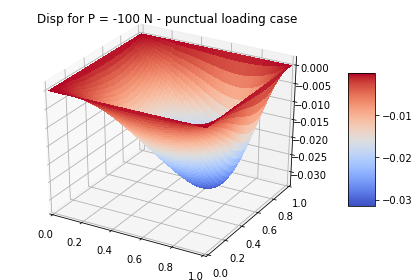

In [5]:
display_disp(X1, X2, X3, P, 'punctual loading case')

**$\Rightarrow$ the displacement does look to be applied in a specific location, even though it has influence over neighbouring points**

#### Case 2 - uniformely distributed loading

In [6]:
## Associated displacement

# Force
P = - 1 * 10**2 #[N]

# sum to get solution
N1 = N2 = np.array([2*i+1 for i in range(5)]) # number of points in the sums (i.e. bigger, the more precise/reliable the result)

# --------------------------------------------------

# Solution

X3 = 0                     # Displacement of (and over) the mesh

for n1 in N1:
    for n2 in N2:
        
        p_n1_n2 = 16*P / (np.pi**2)       # term due to force (may be areal distributed, punctual, etc)

        X3 += (1 / (np.pi**4 * D)) * (p_n1_n2 / (((n1/L1)**2 + (n2/L2)**2)**2)) * np.sin(np.pi * n1 * X1 / L1) * np.sin(np.pi * n2 * X2 / L2)  # Displacement along the mesh (X, Y)


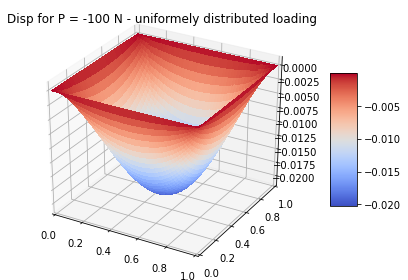

In [7]:
display_disp(X1, X2, X3, P, 'uniformely distributed loading')

**$\Rightarrow$ the displacement does look to be applied all over the mesh. Moreover, the conditions of simple support do appear at the edges as expected.**

#### Case 3 - locally distributed force

In [8]:
## Associated displacement

# Location force
Z1 = 3*L1/4                # x position force
Z2 = 3*L2/4                # y position force

l1 = L1/5                # x position force
l2 = L2/5                 # y position force

# sum to get solution
k  = 30
N1 = N2 = np.array([i for i in range(1, k)]) # number of points in the sums (i.e. bigger, the more precise/reliable the result)

# --------------------------------------------------

# Solution

X3 = 0                     # Displacement of (and over) the mesh

for n1 in N1:
    for n2 in N2:

        p_n1_n2 = 16*P * n1 * n2 / (l1*l2) * np.sin(n1*np.pi*Z1/L1) * np.sin(n2*np.pi*Z2/L2)  *  np.sin(n1*np.pi*l1/(2*L1)) * np.sin(n2*np.pi*l2/(2*L2)) # term due to force (may be areal distributed, punctual, etc)

        X3 += (1 / (np.pi**4 * D)) * (p_n1_n2 / (((n1/L1)**2 + (n2/L2)**2)**2)) * np.sin(np.pi * n1 * X1 / L1) * np.sin(np.pi * n2 * X2 / L2)  # Displacement along the mesh (X, Y)


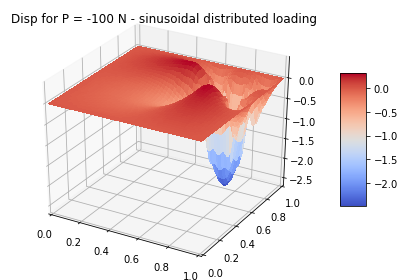

In [9]:
display_disp(X1, X2, X3, P, 'sinusoidal distributed loading')

**$\Rightarrow$ the displacement does look to be applied all over the mesh. Moreover, the conditions of simple support do appear at the edges as expected.**

#### Case 3 - Bonus Levy TD3 - test pas concluant

In [42]:
## Associated displacement

# sum to get solution
k  = 8
N1 = N2 = np.array([i for i in range(1, k)]) # number of points in the sums (i.e. bigger, the more precise/reliable the result)

# --------------------------------------------------

# Solution

X3  = 0                     # Displacement of (and over) the mesh

add = 0

for i in N1:

    lambi = i * np.pi / L1
    alphi = lambi * L2 / 2
    
    add  += (-1)**i / i**2 * np.sin(i*np.pi*X1/L1)
    force = 4 * P * L1/ (np.pi**2 * L2 * add)

    Ki    = 4 * L1**5 / (np.pi**6 * L2) * (-1)**i / i**6
    X3   += Ki * (1 - np.cosh(lambi*X2)/np.cosh(alphi) + lambi / (2*np.cosh(alphi)) * (X2*np.sinh(lambi*X2) - alphi*np.tanh(alphi) * np.cosh(lambi*X2))) * np.sin(lambi*X1)

<ipython-input-42-138d43090241>:21: RuntimeWarning: divide by zero encountered in true_divide
  force = 4 * P * L1/ (np.pi**2 * L2 * add)


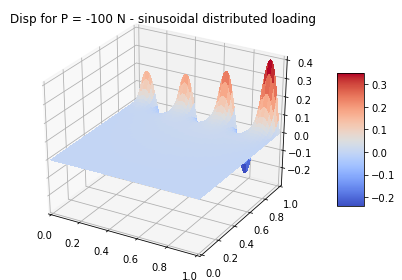

In [43]:
display_disp(X1, X2, X3, P, 'sinusoidal distributed loading')

$\Rightarrow$ **If exact, this solution is illed approached with this method.**